# The final dataset is built here, comprehending:
* Water Quality
* Manual Bacteria Counting
* Automatic Bacteria Counting
* Rain Data
* CSO Data
* Tides

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Paths

In [3]:
data_folder = os.path.join("..", "data")

further_features_folder = os.path.join(data_folder, "further_features")
temporary_results_folder = os.path.join(data_folder, "temporary results")

csos_folder = os.path.join(data_folder, "csos")
rainfall_folder = os.path.join(data_folder, "rainfall")
tide_folder = os.path.join(data_folder, "tide")

# Load Bacteria Data

In [4]:
bacteria_df = pd.read_excel(
    os.path.join(temporary_results_folder, "bacteria_dataset.xlsx")
)

In [12]:
bacteria_df

,DateTime,Site,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std
0,2023-01-31 10:40:00,A,Randa,Randa,9.75,0.353553,8.30,0.141421,0.7100,0.028284,10.00,4.242641,3.0,0.000000
1,2023-02-07 07:30:00,A,Randa,Randa,6.50,0.707107,7.80,0.141421,0.7450,0.007071,17.00,2.828427,6.5,0.707107
2,2023-02-14 09:00:00,A,Randa,Randa,8.50,0.707107,7.80,0.000000,0.8450,0.021213,23.50,3.535534,7.5,3.535534
3,2023-02-21 15:15:00,A,Randa,Randa,10.50,0.707107,7.95,0.070711,1.2900,0.028284,16.00,5.656854,6.0,1.414214
4,2023-02-22 11:50:00,A,Randa,Randa,12.00,NaN,7.90,NaN,0.7400,NaN,54.00,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-01-31 12:13:00,F,Randa,Randa,8.10,0.282843,8.09,0.014142,0.7650,0.007071,6.00,2.828427,7.5,3.535534
263,2023-02-07 08:48:00,F,Randa,Randa,6.00,0.000000,8.10,0.000000,0.7850,0.007071,14.00,0.000000,8.0,2.828427
264,2023-02-14 10:25:00,F,Randa,Randa,8.50,0.707107,7.95,0.070711,0.7800,0.000000,12.50,3.535534,5.0,2.828427
265,2023-02-21 16:40:00,F,Randa,Randa,9.50,0.707107,8.00,0.141421,1.1400,0.028284,20.00,7.071068,5.0,0.000000


In [13]:
bacteria_df.dtypes

DateTime                    datetime64[ns]
Site                                object
Technician Water Quality            object
Technician Counting                 object
Temp C_mean                        float64
Temp C_std                         float64
Ph_mean                            float64
Ph_std                             float64
Cond (ms)_mean                     float64
Cond (ms)_std                      float64
Coliform (1ml)_mean                float64
Coliform (1ml)_std                 float64
Ecoli (1ml)_mean                   float64
Ecoli (1ml)_std                    float64
dtype: object

# Load and add CSO info

In [14]:
hinterland_csos_dict = {}
middle_csos_dict = {}
sea_csos_dict = {}

for folder in os.listdir(csos_folder):
    if folder.startswith("hinterland"):
        for file in os.listdir(os.path.join(csos_folder, folder)):
            filename = file.split(".")[0]
            hinterland_csos_dict[filename] = pd.read_excel(
                os.path.join(csos_folder, folder, file)
            )
    elif folder.startswith("middle"):
        for file in os.listdir(os.path.join(csos_folder, folder)):
            filename = file.split(".")[0]
            middle_csos_dict[filename] = pd.read_excel(
                os.path.join(csos_folder, folder, file)
            )
    elif folder.startswith("sea"):
        for file in os.listdir(os.path.join(csos_folder, folder)):
            filename = file.split(".")[0]
            sea_csos_dict[filename] = pd.read_excel(
                os.path.join(csos_folder, folder, file)
            )

In [15]:
hinterland_csos_dict[list(hinterland_csos_dict.keys())[0]]

,StartDateTime,EndDateTime,Active
0,2023-01-30 14:22:00,2023-01-30 14:26:00,True
1,2023-01-30 14:26:00,2023-02-01 14:08:00,False
2,2023-02-01 14:08:00,2023-02-01 14:12:00,True
3,2023-02-01 14:12:00,2023-02-03 15:22:00,False
4,2023-02-03 15:22:00,2023-02-03 15:26:00,True
...,...,...,...
148,2023-08-05 14:34:00,2023-08-05 14:56:00,True
149,2023-08-05 14:56:00,2023-08-18 21:54:00,False
150,2023-08-18 21:54:00,2023-08-18 22:16:00,True
151,2023-08-18 22:16:00,2023-09-01 10:08:00,False


In [16]:
# Add float column in bacteria_df for each type of CSO
# to indicate the % of open CSOs at the time a sample was taken
bacteria_df["cso_hinterland"] = 0.0
bacteria_df["cso_middle"] = 0.0
bacteria_df["cso_sea"] = 0.0

for index, row in bacteria_df.iterrows():
    date = row["DateTime"]

    # define time range of 3 hours before the sample was taken
    time_range = pd.Interval(
        left=date - pd.Timedelta(hours=3), right=date, closed="both"
    )

    count_percent = 0
    for cso_df in hinterland_csos_dict.values():
        active_delta_dates = cso_df[cso_df["Active"] == True]
        for _, active_delta_dates in active_delta_dates.iterrows():
            time_interval = pd.Interval(
                left=active_delta_dates["StartDateTime"],
                right=active_delta_dates["EndDateTime"],
                closed="both",
            )
            # check if the intersection of the time range and the time interval is not empty
            if time_range.overlaps(time_interval):
                count_percent += 1
                break
    bacteria_df.at[index, "cso_hinterland"] = count_percent / len(
        hinterland_csos_dict
    )

    count_percent = 0
    for cso_df in middle_csos_dict.values():
        active_delta_dates = cso_df[cso_df["Active"] == True]
        for _, active_delta_dates in active_delta_dates.iterrows():
            time_interval = pd.Interval(
                left=active_delta_dates["StartDateTime"],
                right=active_delta_dates["EndDateTime"],
                closed="both",
            )
            # check if the intersection of the time range and the time interval is not empty
            if time_range.overlaps(time_interval):
                count_percent += 1
                break
    bacteria_df.at[index, "cso_middle"] = count_percent / len(middle_csos_dict)

    count_percent = 0
    for cso_df in sea_csos_dict.values():
        active_delta_dates = cso_df[cso_df["Active"] == True]
        for _, active_delta_dates in active_delta_dates.iterrows():
            time_interval = pd.Interval(
                left=active_delta_dates["StartDateTime"],
                right=active_delta_dates["EndDateTime"],
                closed="both",
            )
            # check if the intersection of the time range and the time interval is not empty
            if time_range.overlaps(time_interval):
                count_percent += 1
                break
    bacteria_df.at[index, "cso_sea"] = count_percent / len(sea_csos_dict)

KeyboardInterrupt: 

In [ ]:
bacteria_df

,DateTime,Site,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std,cso_hinterland,cso_middle,cso_sea
0,2023-01-31 10:40:00,A,Randa,Randa,9.75,0.353553,8.30,0.141421,0.7100,0.028284,10.00,4.242641,3.0,0.000000,0.000000,0.142857,0.0
1,2023-02-07 07:30:00,A,Randa,Randa,6.50,0.707107,7.80,0.141421,0.7450,0.007071,17.00,2.828427,6.5,0.707107,0.000000,0.142857,0.0
2,2023-02-14 09:00:00,A,Randa,Randa,8.50,0.707107,7.80,0.000000,0.8450,0.021213,23.50,3.535534,7.5,3.535534,0.166667,0.000000,0.0
3,2023-02-21 15:15:00,A,Randa,Randa,10.50,0.707107,7.95,0.070711,1.2900,0.028284,16.00,5.656854,6.0,1.414214,0.000000,0.000000,0.0
4,2023-02-22 11:50:00,A,Randa,Randa,12.00,NaN,7.90,NaN,0.7400,NaN,54.00,NaN,4.0,NaN,0.333333,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-01-31 12:13:00,F,Randa,Randa,8.10,0.282843,8.09,0.014142,0.7650,0.007071,6.00,2.828427,7.5,3.535534,0.000000,0.142857,0.0
263,2023-02-07 08:48:00,F,Randa,Randa,6.00,0.000000,8.10,0.000000,0.7850,0.007071,14.00,0.000000,8.0,2.828427,0.000000,0.142857,0.0
264,2023-02-14 10:25:00,F,Randa,Randa,8.50,0.707107,7.95,0.070711,0.7800,0.000000,12.50,3.535534,5.0,2.828427,0.000000,0.000000,0.0
265,2023-02-21 16:40:00,F,Randa,Randa,9.50,0.707107,8.00,0.141421,1.1400,0.028284,20.00,7.071068,5.0,0.000000,0.000000,0.000000,0.0


# Load and add Rainfall info

In [ ]:
rainfall_station_dict = {}

for file in os.listdir(rainfall_folder):
    filename = file.split(".")[0]
    rainfall_station_dict[filename] = pd.read_csv(
        os.path.join(rainfall_folder, file), index_col="dateTime"
    )
    rainfall_station_dict[filename].index = pd.to_datetime(
        rainfall_station_dict[filename].index
    ).tz_localize(None)
    rainfall_station_dict[filename].sort_index(inplace=True)

In [ ]:
bacteria_df["rained"] = False
bacteria_df["mean_rainfall"] = 0.0

In [ ]:
hours_before = 6

In [ ]:
for index, row in bacteria_df.iterrows():
    sum_per_site = []

    for site, site_rainfall_df in rainfall_station_dict.items():
        # get datetime index of sample which is closest to the current row datetime
        site_idx = site_rainfall_df.index[
            site_rainfall_df.index.get_indexer(
                [row["DateTime"]], method="nearest"
            )
        ]
        # get datetime which is 'hours_before' hours before the current row datetime
        initial_idx = site_idx - pd.Timedelta(hours=hours_before)

        # get actual datetime index which is closest to the initial_idx
        # (it could be more or less than 'hours_before' hours before the sample datetime)
        # TODO: this could be handled better after
        initial_site_idx = site_rainfall_df.index[
            site_rainfall_df.index.get_indexer([initial_idx], method="nearest")
        ]
        # get actual time range in hours
        actual_time_range = site_idx - initial_site_idx
        actual_time_range = actual_time_range[0].seconds // 3600

        # get sum of rainfall hours_before hours before sample
        if actual_time_range > 0:
            initial_site_idx_str = initial_site_idx.strftime(
                "%Y-%m-%d %H:%M:%S"
            )[0]
            site_idx_str = site_idx.strftime("%Y-%m-%d %H:%M:%S")[0]

            sum_per_site.append(
                site_rainfall_df.loc[initial_site_idx_str:site_idx_str][
                    "value"
                ].sum()
            )
        else:
            sum_per_site.append(0)

    mean_rainfall = sum(sum_per_site) / len(sum_per_site)
    bacteria_df.at[index, "mean_rainfall"] = mean_rainfall
    if mean_rainfall > 0:
        bacteria_df.at[index, "rained"] = True

In [ ]:
bacteria_df.columns.to_list()

['DateTime',
 'Site',
 'Technician Water Quality',
 'Technician Counting',
 'Temp C_mean',
 'Temp C_std',
 'Ph_mean',
 'Ph_std',
 'Cond (ms)_mean',
 'Cond (ms)_std',
 'Coliform (1ml)_mean',
 'Coliform (1ml)_std',
 'Ecoli (1ml)_mean',
 'Ecoli (1ml)_std',
 'cso_hinterland',
 'cso_middle',
 'cso_sea',
 'rained',
 'mean_rainfall']

# Checkpoint: Store bacteria_df

In [ ]:
bacteria_df.to_excel(
    os.path.join(temporary_results_folder, "cp_bacteria_dataset.xlsx"),
    index=False,
)

# Checkpoint: Load bacteria_df

In [5]:
bacteria_df = pd.read_excel(
    os.path.join(temporary_results_folder, "cp_bacteria_dataset.xlsx"),
)

In [18]:
bacteria_df

,DateTime,Site,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std,cso_hinterland,cso_middle,cso_sea,rained,mean_rainfall
0,2023-01-31 10:40:00,A,Randa,Randa,9.75,0.353553,8.30,0.141421,0.7100,0.028284,10.00,4.242641,3.0,0.000000,0.000000,0.142857,0.0,False,0.00000
1,2023-02-07 07:30:00,A,Randa,Randa,6.50,0.707107,7.80,0.141421,0.7450,0.007071,17.00,2.828427,6.5,0.707107,0.000000,0.142857,0.0,False,0.00000
2,2023-02-14 09:00:00,A,Randa,Randa,8.50,0.707107,7.80,0.000000,0.8450,0.021213,23.50,3.535534,7.5,3.535534,0.166667,0.000000,0.0,True,0.03750
3,2023-02-21 15:15:00,A,Randa,Randa,10.50,0.707107,7.95,0.070711,1.2900,0.028284,16.00,5.656854,6.0,1.414214,0.000000,0.000000,0.0,False,0.00000
4,2023-02-22 11:50:00,A,Randa,Randa,12.00,NaN,7.90,NaN,0.7400,NaN,54.00,NaN,4.0,NaN,0.333333,0.000000,0.0,True,2.33750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-01-31 12:13:00,F,Randa,Randa,8.10,0.282843,8.09,0.014142,0.7650,0.007071,6.00,2.828427,7.5,3.535534,0.000000,0.142857,0.0,False,0.00000
263,2023-02-07 08:48:00,F,Randa,Randa,6.00,0.000000,8.10,0.000000,0.7850,0.007071,14.00,0.000000,8.0,2.828427,0.000000,0.142857,0.0,False,0.00000
264,2023-02-14 10:25:00,F,Randa,Randa,8.50,0.707107,7.95,0.070711,0.7800,0.000000,12.50,3.535534,5.0,2.828427,0.000000,0.000000,0.0,True,0.48125
265,2023-02-21 16:40:00,F,Randa,Randa,9.50,0.707107,8.00,0.141421,1.1400,0.028284,20.00,7.071068,5.0,0.000000,0.000000,0.000000,0.0,False,0.00000


# Load and add Tides Info

In [6]:
tides_df = pd.read_excel(os.path.join(tide_folder, "tide_dataset.xlsx"))

tides_df["dateTime"] = pd.to_datetime(tides_df["dateTime"]).dt.tz_localize(None)
tides_df.drop(columns=["Unnamed: 0"], inplace=True)

In [20]:
tides_df

,dateTime,value
0,2023-01-30 00:00:00,-0.536
1,2023-01-30 00:15:00,-0.719
2,2023-01-30 00:30:00,-0.906
3,2023-01-30 00:45:00,-1.079
4,2023-01-30 01:00:00,-1.217
...,...,...
21947,2023-09-09 22:45:00,2.183
21948,2023-09-09 23:00:00,2.000
21949,2023-09-09 23:15:00,1.758
21950,2023-09-09 23:30:00,1.524


In [7]:
tides_df.set_index("dateTime", inplace=True)

In [22]:
tides_df.dtypes

value    float64
dtype: object

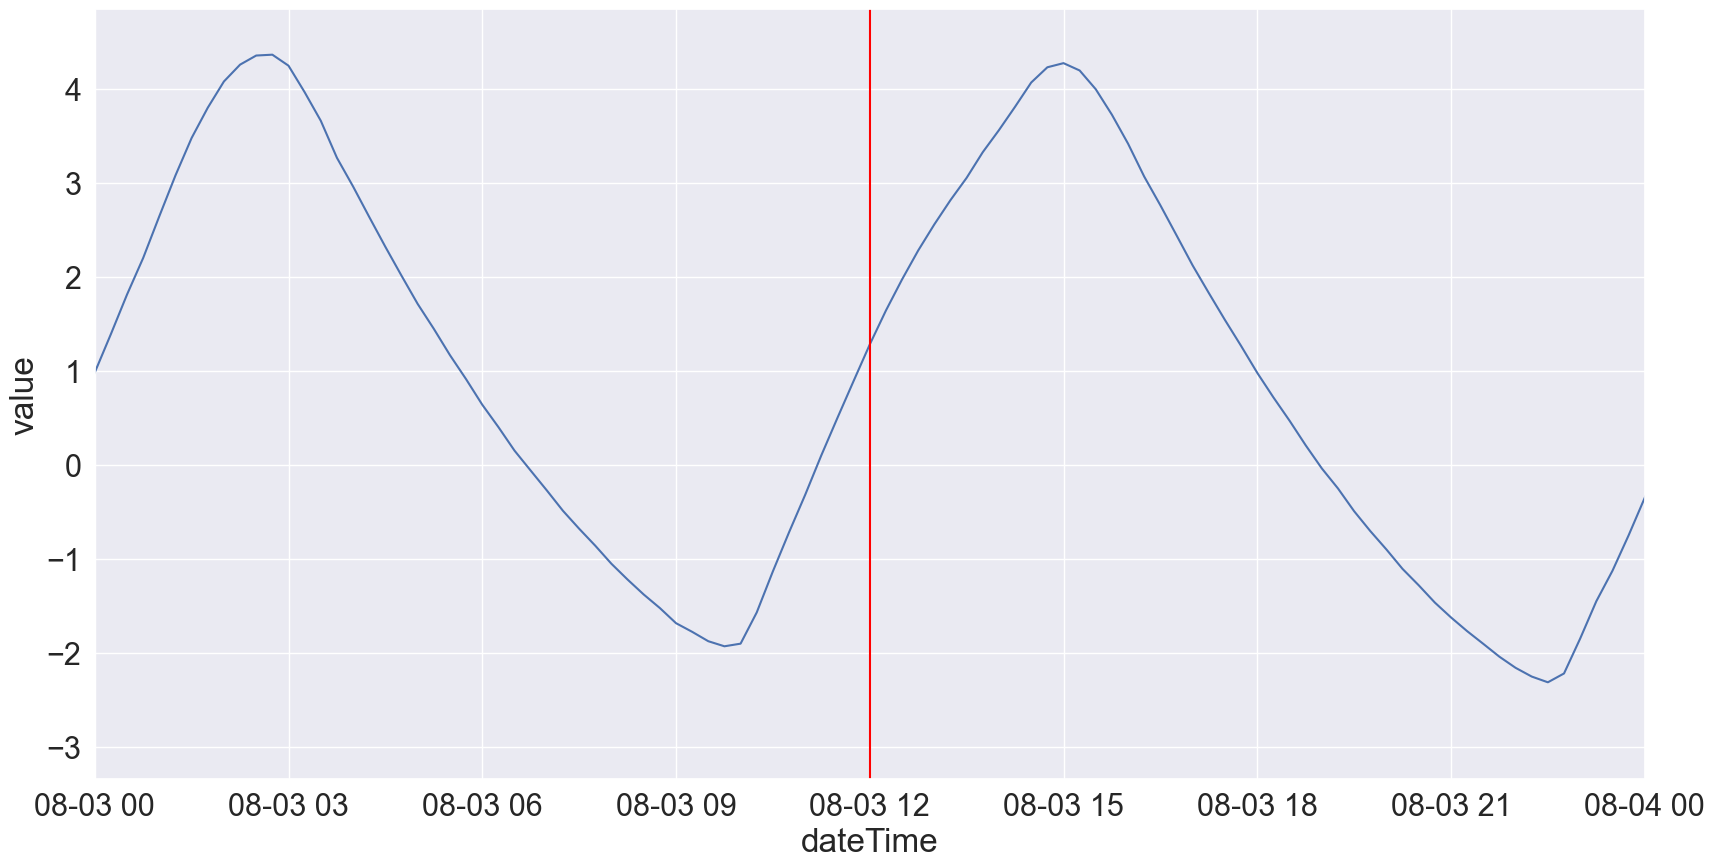

In [15]:
plt.figure(figsize=(20, 10))

# set font size
sns.set(font_scale=2)

sns.lineplot(data=tides_df, x="dateTime", y="value")
# range of dates to plot
plt.xlim(pd.Timestamp("2023-08-03"), pd.Timestamp("2023-08-04"))

# plot vertical line at time of sample
plt.axvline(x=pd.Timestamp("2023-08-03 12:00:00"), color="red")

In [24]:
# Add float column in bacteria_df that can assume a value between -1 and 1
# such that a sample taken at low tide has a value close to -1
# and a sample taken at high tide has a value close to 1
# NB: low and high tides are defined locally for each day since the max and min values of the tide
# are different for each day

bacteria_df["tide_value"] = 0.0

for index, row in bacteria_df.iterrows():
    date = row["DateTime"]
    closest_index = tides_df.index[
        tides_df.index.get_indexer([date], method="nearest")
    ]
    closest_tide = tides_df.loc[closest_index]["value"].values[0]

    closest_before_index = tides_df.index[
        tides_df.index.get_indexer(
            [date - pd.Timedelta(hours=3)], method="nearest"
        )
    ].values[0]

    closest_after_index = tides_df.index[
        tides_df.index.get_indexer(
            [date + pd.Timedelta(hours=3)], method="nearest"
        )
    ].values[0]

    min_tide = tides_df.loc[closest_before_index:closest_after_index][
        "value"
    ].min()
    max_tide = tides_df.loc[closest_before_index:closest_after_index][
        "value"
    ].max()

    min_index = tides_df.loc[closest_before_index:closest_after_index][
        "value"
    ].idxmin()
    max_index = tides_df.loc[closest_before_index:closest_after_index][
        "value"
    ].idxmax()

    # scale tide value between -1 and 1
    tide_value = (2 * ((closest_tide - min_tide) / (max_tide - min_tide))) - 1

    bacteria_df.at[index, "tide_value"] = tide_value

In [25]:
bacteria_df

,DateTime,Site,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std,cso_hinterland,cso_middle,cso_sea,rained,mean_rainfall,tide_value
0,2023-01-31 10:40:00,A,Randa,Randa,9.75,0.353553,8.30,0.141421,0.7100,0.028284,10.00,4.242641,3.0,0.000000,0.000000,0.142857,0.0,False,0.00000,0.597659
1,2023-02-07 07:30:00,A,Randa,Randa,6.50,0.707107,7.80,0.141421,0.7450,0.007071,17.00,2.828427,6.5,0.707107,0.000000,0.142857,0.0,False,0.00000,-0.356573
2,2023-02-14 09:00:00,A,Randa,Randa,8.50,0.707107,7.80,0.000000,0.8450,0.021213,23.50,3.535534,7.5,3.535534,0.166667,0.000000,0.0,True,0.03750,0.051597
3,2023-02-21 15:15:00,A,Randa,Randa,10.50,0.707107,7.95,0.070711,1.2900,0.028284,16.00,5.656854,6.0,1.414214,0.000000,0.000000,0.0,False,0.00000,0.969479
4,2023-02-22 11:50:00,A,Randa,Randa,12.00,NaN,7.90,NaN,0.7400,NaN,54.00,NaN,4.0,NaN,0.333333,0.000000,0.0,True,2.33750,-0.478592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-01-31 12:13:00,F,Randa,Randa,8.10,0.282843,8.09,0.014142,0.7650,0.007071,6.00,2.828427,7.5,3.535534,0.000000,0.142857,0.0,False,0.00000,0.031250
263,2023-02-07 08:48:00,F,Randa,Randa,6.00,0.000000,8.10,0.000000,0.7850,0.007071,14.00,0.000000,8.0,2.828427,0.000000,0.142857,0.0,False,0.00000,-0.670635
264,2023-02-14 10:25:00,F,Randa,Randa,8.50,0.707107,7.95,0.070711,0.7800,0.000000,12.50,3.535534,5.0,2.828427,0.000000,0.000000,0.0,True,0.48125,-0.256164
265,2023-02-21 16:40:00,F,Randa,Randa,9.50,0.707107,8.00,0.141421,1.1400,0.028284,20.00,7.071068,5.0,0.000000,0.000000,0.000000,0.0,False,0.00000,0.268022


# Final check and store

In [26]:
bacteria_df.isna().sum()

DateTime                      0
Site                          0
Technician Water Quality    182
Technician Counting           0
Temp C_mean                   0
Temp C_std                    7
Ph_mean                       0
Ph_std                        7
Cond (ms)_mean                0
Cond (ms)_std                 7
Coliform (1ml)_mean           0
Coliform (1ml)_std            7
Ecoli (1ml)_mean              0
Ecoli (1ml)_std               7
cso_hinterland                0
cso_middle                    0
cso_sea                       0
rained                        0
mean_rainfall                 0
tide_value                    0
dtype: int64

In [27]:
bacteria_df.dtypes

DateTime                    datetime64[ns]
Site                                object
Technician Water Quality            object
Technician Counting                 object
Temp C_mean                        float64
Temp C_std                         float64
Ph_mean                            float64
Ph_std                             float64
Cond (ms)_mean                     float64
Cond (ms)_std                      float64
Coliform (1ml)_mean                float64
Coliform (1ml)_std                 float64
Ecoli (1ml)_mean                   float64
Ecoli (1ml)_std                    float64
cso_hinterland                     float64
cso_middle                         float64
cso_sea                            float64
rained                                bool
mean_rainfall                      float64
tide_value                         float64
dtype: object

In [28]:
bacteria_df["rained"] = bacteria_df["rained"].astype(int)

In [29]:
# add sum of bacteria count
bacteria_df["bacteria_sum"] = (
    bacteria_df["Ecoli (1ml)_mean"] + bacteria_df["Coliform (1ml)_mean"]
)

In [30]:
bacteria_df.to_excel(
    os.path.join(temporary_results_folder, "overall_dataset.xlsx"),
    index=False,
)